<a href="https://colab.research.google.com/github/italolima04/data-science/blob/master/COVID-ESTADOS-BRASIL/COVID_19_Estados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas e Visualizando os Dados

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')

In [0]:
df.head(10)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-05-10,AL,Anadia,city,2,1,True,17545.0,2700201.0,11.39926,0.5000
1,2020-05-10,AL,Arapiraca,city,39,5,True,231747.0,2700300.0,16.82870,0.1282
2,2020-05-10,AL,Atalaia,city,10,0,True,47185.0,2700409.0,21.19318,0.0000
3,2020-05-10,AL,Barra de Santo Antônio,city,1,0,True,15932.0,2700508.0,6.27668,0.0000
4,2020-05-10,AL,Barra de São Miguel,city,5,0,True,8322.0,2700607.0,60.08171,0.0000
5,2020-05-10,AL,Batalha,city,3,1,True,18232.0,2700706.0,16.45459,0.3333
6,2020-05-10,AL,Boca da Mata,city,6,0,True,27281.0,2701001.0,21.99333,0.0000
7,2020-05-10,AL,Branquinha,city,1,0,True,10494.0,2701100.0,9.52925,0.0000
8,2020-05-10,AL,Cacimbinhas,city,1,1,True,10858.0,2701209.0,9.20980,1.0000
9,2020-05-10,AL,Cajueiro,city,1,0,True,21264.0,2701308.0,4.70278,0.0000


# Manipulando os Dados

Como vamos trabalhar com os estados, devemos selecionar do Data Frame original somente as linhas em que a coluna 'place_type' for igual a state

Além disso, iremos selecionar somente as colunas de interesse para esse estudo

**É possível então realizar esses dois processos utilizando um único método, este é o loc do Pandas.**

In [0]:
dados = df.loc[df.place_type == 'state', ['state', 'confirmed', 'deaths', 'is_last', 'estimated_population_2019', 'confirmed_per_100k_inhabitants']]
dados

,state,confirmed,deaths,is_last,estimated_population_2019,confirmed_per_100k_inhabitants
69,AL,2258,126,True,3337357.0,67.65833
126,AM,12599,1004,True,4144597.0,303.98613
144,AP,2613,72,True,845731.0,308.96349
318,CE,16692,1114,True,9132078.0,182.78425
321,DF,2682,42,True,3015268.0,88.94732
...,...,...,...,...,...,...
67009,SP,2,0,False,45919049.0,0.00436
67011,SP,2,0,False,45919049.0,0.00436
67013,SP,1,0,False,45919049.0,0.00218
67015,SP,1,0,False,45919049.0,0.00218


Nesses novos dados, desejamos trabalhar apenas com os últimos registros organizados a partir da coleta de dados dos boletins epidemiológicos

**Para isso, iremos filtrar do Data Frame todas as linhas nas quais a coluna 'is_last' for igual a True, também através do método loc**

In [0]:
dados = dados.loc[dados.is_last == True, :]
dados

,state,confirmed,deaths,is_last,estimated_population_2019,confirmed_per_100k_inhabitants
69,AL,2258,126,True,3337357.0,67.65833
126,AM,12599,1004,True,4144597.0,303.98613
144,AP,2613,72,True,845731.0,308.96349
318,CE,16692,1114,True,9132078.0,182.78425
321,DF,2682,42,True,3015268.0,88.94732
401,GO,1093,47,True,7018354.0,15.57345
565,MA,8144,399,True,7075181.0,115.10660
821,MG,3237,119,True,21168791.0,15.29138
867,MT,519,18,True,3484466.0,14.89468
1001,PA,7348,672,True,8602865.0,85.41341


**Podemos verificar a quantidade de linhas (que são respectivamente os estados) utilizando o método len**

In [0]:
len(dados)

27

Após manipular o Data Frame e obter somente os dados equivalentes aos últimos registros, podemos retirar a coluna 'is_last'

**Para isso, utilizamos o método drop do Pandas, passando como parâmetro a coluna a ser removida**

In [0]:
dados = dados.drop('is_last', axis=1)
dados

,state,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants
69,AL,2258,126,3337357.0,67.65833
126,AM,12599,1004,4144597.0,303.98613
144,AP,2613,72,845731.0,308.96349
318,CE,16692,1114,9132078.0,182.78425
321,DF,2682,42,3015268.0,88.94732
401,GO,1093,47,7018354.0,15.57345
565,MA,8144,399,7075181.0,115.10660
821,MG,3237,119,21168791.0,15.29138
867,MT,519,18,3484466.0,14.89468
1001,PA,7348,672,8602865.0,85.41341


# Verificando os Dados por Região

Nessa parte do estudo, desejamos agrupar os estados de acordo com a sua respectiva região

**Para isso, criaremos 5 Data Frames, baseado no Data Frame principal, utilizando o método query() para filtrar os estados desejados para cada região**

In [0]:
norte = dados.query("state in ['AC', 'AP', 'AM', 'PA', 'TO', 'RR']")
norte

,state,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants
126,AM,12599,1004,4144597.0,303.98613
144,AP,2613,72,845731.0,308.96349
1001,PA,7348,672,8602865.0,85.41341
1643,RR,1290,21,605761.0,212.95527
2499,AC,1335,40,881935.0,151.37170
5263,TO,688,11,1572866.0,43.74181


In [0]:
nordeste = dados.query("state in ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI	', 'RN', 'SE']")
nordeste

,state,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants
69,AL,2258,126,3337357.0,67.65833
318,CE,16692,1114,9132078.0,182.78425
565,MA,8144,399,7075181.0,115.10660
1103,PB,2341,135,4018127.0,58.26098
1254,PE,13275,1047,9557071.0,138.90239
2063,SE,1771,34,2298696.0,77.04368
2809,BA,5174,196,14873064.0,34.78772
7174,RN,1919,87,3506853.0,54.72143


In [0]:
centro_oeste = dados.query("state in ['DF', 'GO', 'MT', 'MS']")
centro_oeste

,state,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants
321,DF,2682,42,3015268.0,88.94732
401,GO,1093,47,7018354.0,15.57345
867,MT,519,18,3484466.0,14.89468
3583,MS,346,11,2778986.0,12.45058


In [0]:
sudeste = dados.query("state in ['ES', 'MG', 'RJ', 'SP']")
sudeste

,state,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants
821,MG,3237,119,21168791.0,15.29138
1592,RJ,17062,1714,17264943.0,98.82454
2480,SP,45444,3709,45919049.0,98.96546
3064,ES,4412,172,4018650.0,109.78811


In [0]:
sul = dados.query("state in ['PR', 'RS', 'SC']")
sul

,state,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants
1504,PR,1859,112,11433957.0,16.25859
1838,RS,2576,100,11377239.0,22.64170
2005,SC,3429,65,7164788.0,47.85906


# Total de Casos Confirmados por Região

**Agora, depois de agrupar os estados e visualizar os dados das regiões, podemos somá-los para verificar qual região possui o maior número de casos confirmados**

In [0]:
casos_norte = norte['confirmed'].sum()
casos_norte 

25873

In [0]:
casos_nordeste = nordeste['confirmed'].sum()
casos_nordeste 

51574

In [0]:
casos_centro_oeste = centro_oeste['confirmed'].sum()
casos_centro_oeste

4640

In [0]:
casos_sudeste = sudeste['confirmed'].sum()
casos_sudeste

70155

In [0]:
casos_sul = sul['confirmed'].sum()
casos_sul

7864

Depois de verificar, podemos visualizar o gráfico de casos confirmados por região

**Para isso, iremos agrupar as regiões e os casos somados, e gerar um gráfico de barras respectivo entre a região e os casos para mesma**

In [0]:
regioes = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']

In [0]:
casos = [casos_norte, casos_nordeste, casos_centro_oeste, casos_sudeste, casos_sul]

**É possível gerar esse gráfico utilizando matplotlib de forma bem simples, com o plt.bar()**

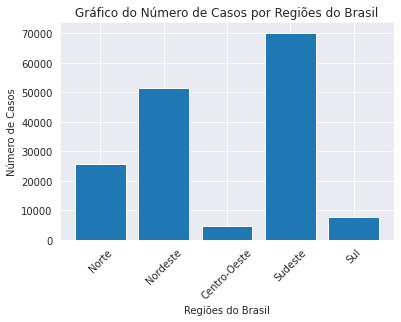

In [0]:
x = regioes
y = casos
plt.bar(x, y)

plt.title('Gráfico do Número de Casos por Regiões do Brasil')
plt.xlabel('Regiões do Brasil')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)

plt.show()

# Total de Mortes por Região

De forma análoga ao processo anterior, iremos verificar agora o número de mortes por região, podendo inferir qual possui o maior valor registrado

In [0]:
mortes_norte = norte['deaths'].sum()
mortes_norte 

1820

In [0]:
mortes_nordeste = nordeste['deaths'].sum()
mortes_nordeste 

3138

In [0]:
mortes_centro_oeste = centro_oeste['deaths'].sum()
mortes_centro_oeste 

118

In [0]:
mortes_sudeste = sudeste['deaths'].sum()
mortes_sudeste 

5714

In [0]:
mortes_sul = sul['deaths'].sum()
mortes_sul 

277

**Iremos também agrupar os dados de forma com que as regiões fiquem relacionadas com seus números respectivos**

In [0]:
mortes = [mortes_norte, mortes_nordeste, mortes_centro_oeste, mortes_sudeste, mortes_sul]

**E por fim, podemos também visualizar os números em forma de gráfico de barras**

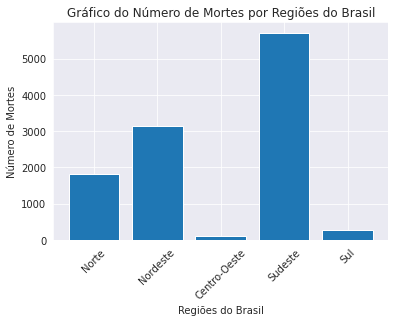

In [0]:
x = regioes
y = mortes
plt.bar(x, y)

plt.title('Gráfico do Número de Mortes por Regiões do Brasil')
plt.xlabel('Regiões do Brasil')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=45)

plt.show()

# Verificando e Visualizando Dados Populacionais dos Estados

Vamos verificar de forma ordenada quais são os estados que possuem maior população de acordo com o estimado pela nossa base de dados.

**Para isso, criamos um novo Data Frame a partir do DF anterior, ordenando os valores através do método sort_values (), passando como parâmetro a coluna em que deve ser aplicado e a forma com os dados devem ser ordenados, nesse caso de forma decrescente**

In [0]:
dados_pop = dados.sort_values(by='estimated_population_2019',ascending=False)
dados_pop = dados_pop[['state', 'estimated_population_2019']]
dados_pop

,state,estimated_population_2019
2480,SP,45919049.0
821,MG,21168791.0
1592,RJ,17264943.0
2809,BA,14873064.0
1504,PR,11433957.0
1838,RS,11377239.0
1254,PE,9557071.0
318,CE,9132078.0
1001,PA,8602865.0
2005,SC,7164788.0


Para tornar mais didático a apresentação, podemos visualizar os dados através de um gráfico de barras.

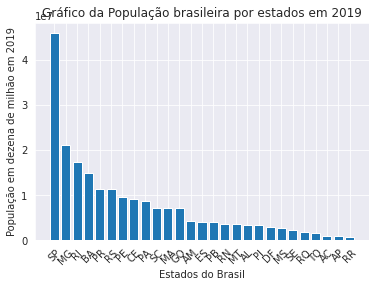

In [0]:
plt.bar(dados_pop['state'], dados_pop['estimated_population_2019'])

plt.title('Gráfico da População brasileira por estados em 2019')
plt.xlabel('Estados do Brasil')
plt.ylabel('População em dezena de milhão em 2019')
plt.xticks(rotation=45)

plt.show()

**Nesse caso, a visualização básica é confusa e pouco representativa**

**Para melhorar esse aspecto, utilizaremos uma outra biblioteca de forma conjunta com a Matplotlib, a Seaborn**

**A biblioteca Seaborn permite entre outras coisas a configuração da paleta de cores, o número de cores a partir dos dados e o estilo para o gráfico**


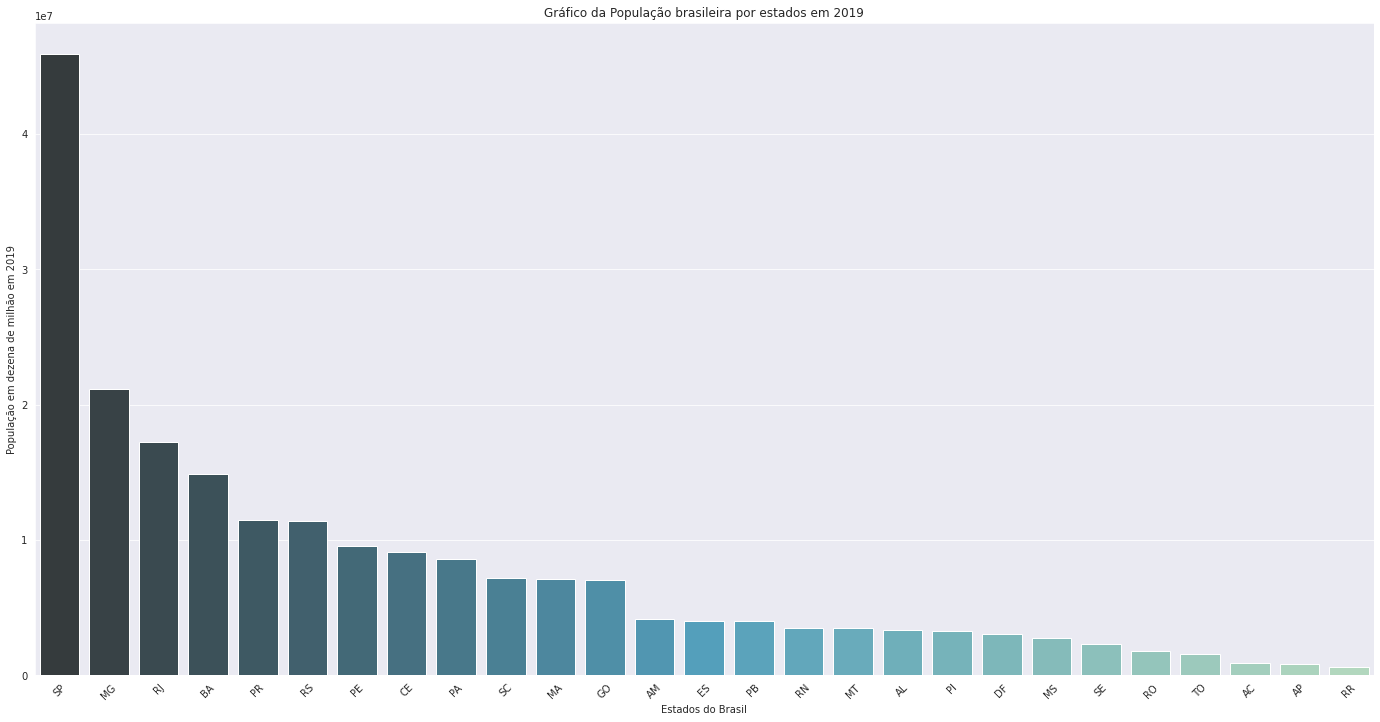

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(24,12))

sns.barplot(x=dados_pop.state, 
            y=dados_pop.estimated_population_2019,
            palette=sns.color_palette('GnBu_d' ,n_colors=len(dados_pop.state)))

plt.title('Gráfico da População brasileira por estados em 2019')
plt.xlabel('Estados do Brasil')
plt.ylabel('População em dezena de milhão em 2019')
plt.xticks(rotation=45)

plt.show()

# Comparando Dados da COVID-19. Absolutos x Proporcionais

Após verificar os dados populacionais, agora iremos trabalhar de forma mais direta com os dados relacionados com a COVID-19

**Criar um novo DF apenas com as colunas que contenham dados diretamente referentes a COVID-19,  a partir da desestruturação [ ] do DF anterior**

In [0]:
dados_covid = dados[['state', 'confirmed', 'deaths', 'confirmed_per_100k_inhabitants']].reset_index()
dados_covid = dados_covid.drop('index', axis=1)
dados_covid.head(10)

,state,confirmed,deaths,confirmed_per_100k_inhabitants
0,AL,2258,126,67.65833
1,AM,12599,1004,303.98613
2,AP,2613,72,308.96349
3,CE,16692,1114,182.78425
4,DF,2682,42,88.94732
5,GO,1093,47,15.57345
6,MA,8144,399,115.10660
7,MG,3237,119,15.29138
8,MT,519,18,14.89468
9,PA,7348,672,85.41341


Nessa parte do estudo, vamos verificar de forma ordenada os estados com maior número de casos registrados de covid

**Para isso, utilizaremos o método sort_values() como no processo anterior**

In [0]:
dados_confirmed = dados_covid.sort_values(by='confirmed', ascending=False)
dados_confirmed = dados_confirmed[['state', 'confirmed']]
dados_confirmed

,state,confirmed
20,SP,45444
14,RJ,17062
3,CE,16692
11,PE,13275
1,AM,12599
6,MA,8144
9,PA,7348
22,BA,5174
23,ES,4412
18,SC,3429


**Iremos também gerar o gráfico utilizando a biblioteca Seaborn**

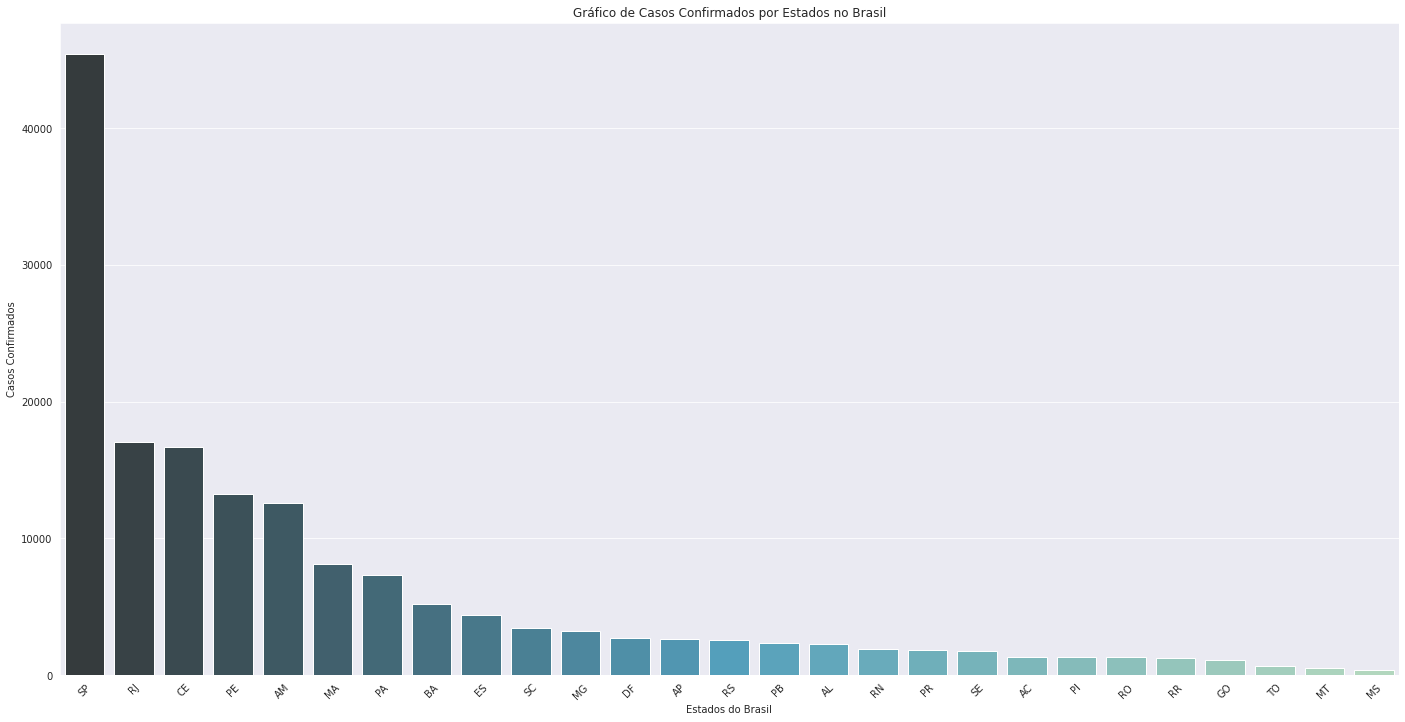

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(24,12))

sns.barplot(x=dados_confirmed.state, 
            y=dados_confirmed.confirmed,
            palette=sns.color_palette('GnBu_d' ,n_colors=len(dados_confirmed.state)))

plt.title('Gráfico de Casos Confirmados por Estados no Brasil')
plt.xlabel('Estados do Brasil')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)

plt.show()

Essa visualização acima mostra os estados que possuem mais casos acumulados registrados, no entanto, vimos que os estados do Brasil possuem discrepâncias entre suas respectivas populações, por isso não seria mais justo uma comparação proporcional ?

**Para realizar essa comparação, iremos agora ordenar os estados de acordo com o número de casos confirmados por 100 mil habitantes**

In [0]:
dados_habitants = dados_covid.sort_values(by='confirmed_per_100k_inhabitants', ascending=False)
dados_habitants = dados_habitants[['state', 'confirmed_per_100k_inhabitants']]
dados_habitants

,state,confirmed_per_100k_inhabitants
2,AP,308.96349
1,AM,303.98613
16,RR,212.95527
3,CE,182.78425
21,AC,151.37170
11,PE,138.90239
6,MA,115.10660
23,ES,109.78811
20,SP,98.96546
14,RJ,98.82454


Há mudanças significativas, não é ?

**Para melhor visualizar, podemos novamente gerar o gráfico de barras, baseando-se no modelo anterior**

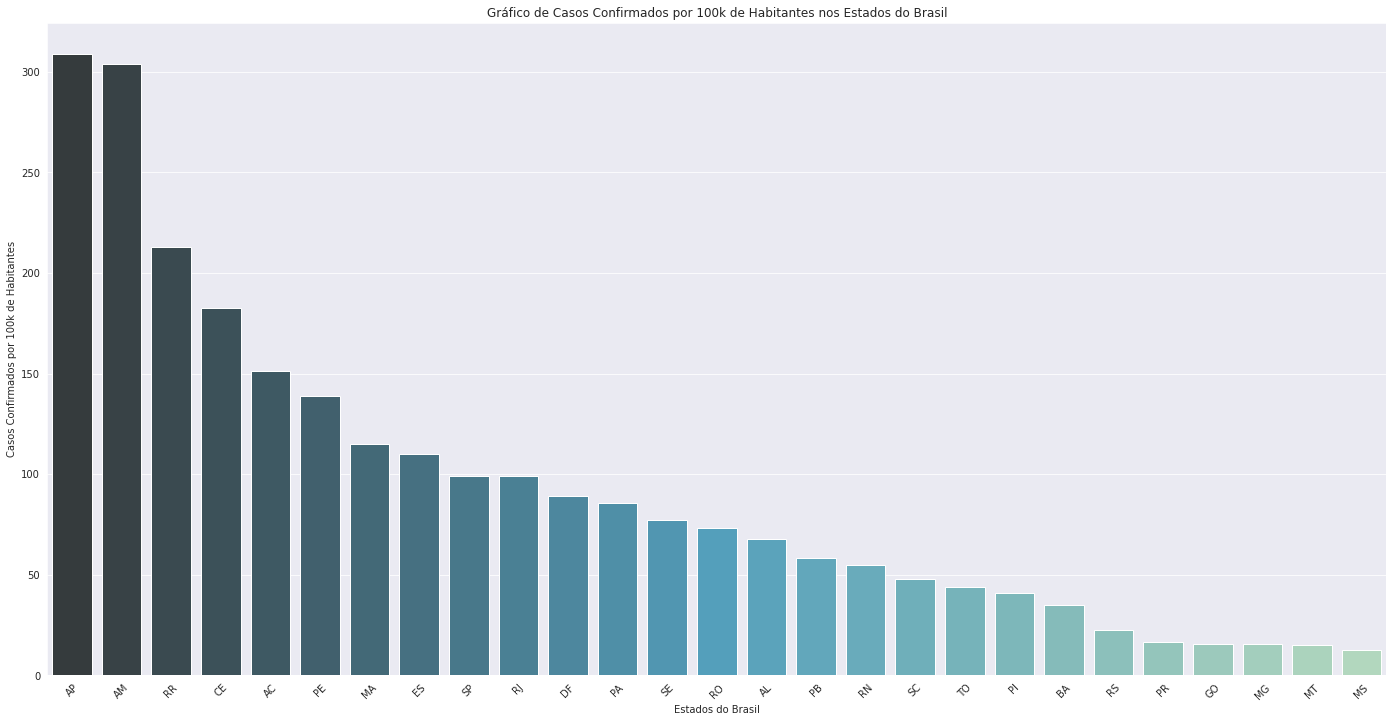

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(24,12))

sns.barplot(x=dados_habitants.state, 
            y=dados_habitants.confirmed_per_100k_inhabitants,
            palette=sns.color_palette('GnBu_d' ,n_colors=len(dados_habitants.state)))

plt.title('Gráfico de Casos Confirmados por 100k de Habitantes nos Estados do Brasil')
plt.xlabel('Estados do Brasil')
plt.ylabel('Casos Confirmados por 100k de Habitantes')
plt.xticks(rotation=45)

plt.show()

# Parte Complementar

**De forma complementar, podemos repetir o processo e verificar quais são os estados com registro de mortes, gerando seu respectivo gráfico de barras para o Data Frame.**

In [0]:
dados_deaths = dados_covid.sort_values(by='deaths', ascending=False)
dados_deaths = dados_deaths[['state', 'deaths']]
dados_deaths

,state,deaths
20,SP,3709
14,RJ,1714
3,CE,1114
11,PE,1047
1,AM,1004
9,PA,672
6,MA,399
22,BA,196
23,ES,172
10,PB,135


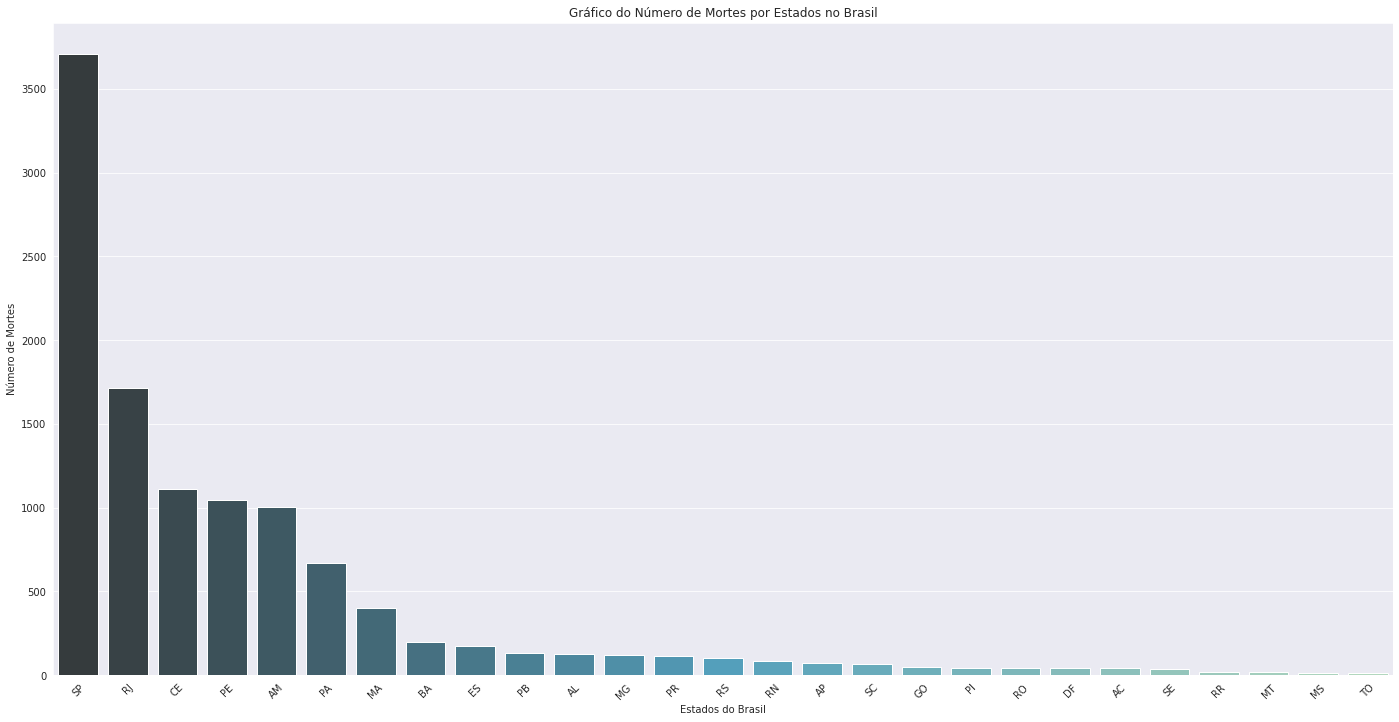

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(24,12))

sns.barplot(x=dados_deaths.state, 
            y=dados_deaths.deaths,
            palette=sns.color_palette('GnBu_d' ,n_colors=len(dados_deaths.state)))

plt.title('Gráfico do Número de Mortes por Estados no Brasil')
plt.xlabel('Estados do Brasil')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=45)

plt.show()